# Introduction

Le jeu de données Levine_13dim est un jeu à 13 dimensions de cellules analysées par Cytométrie de masse. IL contient 167 044 cellules, toutes décrites par 13 marqueurs (protéïnes). Des labels (au nombre de 24) sont disponibles pour 49% du jeu de données.
En résumé on a donc :
  - n = 167 044
  - p = 14

L'objectif du travail est de réaliser un clustering sur ce jeu de données. Dans un premier temps réaliser un clustering sur l'ensemble du dataset, potentiellement en passant au préalable par une analyse en composantes principales. Puis caractériser chaque cluster obtenu. Enfin, récommencer ce travail sur chaque cluster afin de tenter d'obtenir des sous clusters plus fin potentiellement basés sur des variables latentes.
Les algorithmes de clustering à utliser restent à définir.

PS : Un second jeu de données à 32 dimensions est également disponible si les perspectives sont trop rapidement limitées. L'objectif à long terme serait d'appliquer les fruits de ce travail sur un jeu à 340 dimensions.

# Exploration des variables

In [ ]:
!pip install dexplot
import dexplot as dxp

     |████████████████████████████████| 173 kB 4.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Levine_13dim.txt", sep="\t")
data.shape

(26552, 14)

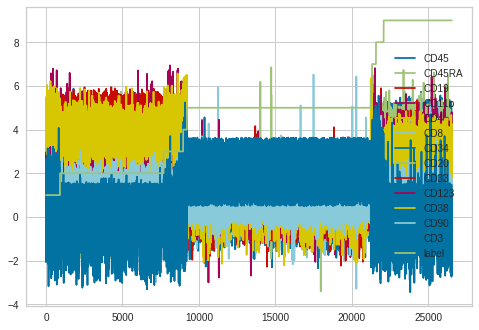

In [ ]:
data.plot()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


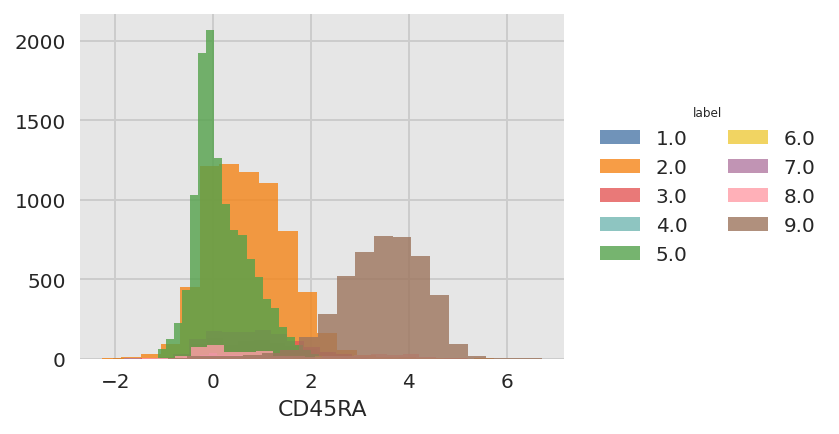

In [ ]:
dxp.hist(val='CD45', data=data, split='label')
dxp.hist(val='CD45RA', data=data, split='label')

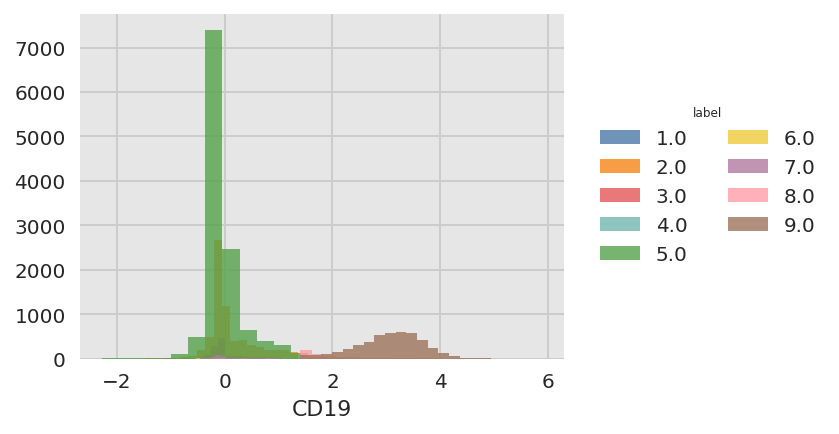

In [ ]:
dxp.hist(val='CD45RA', data=data, split='label')
dxp.hist(val='CD19', data=data, split='label')

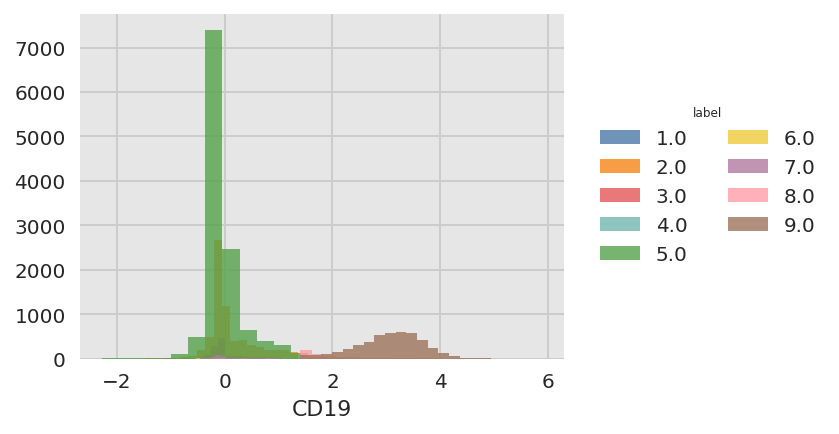

In [ ]:
dxp.hist(val='CD19', data=data, split='label')

In [ ]:
!pip install dython
from dython.nominal import associations
associations(data,figsize =(20,20))

ModuleNotFoundError: ignored

In [ ]:
dxp.scatter(x='CD45', y='CD33', data=data, split='label')

# Clustering

---



## kmeans

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
# Load Data

data = pd.read_csv("/content/Levine_13dim.txt", sep="\t")
data.head()

,CD45,CD45RA,CD19,CD11b,CD4,CD8,CD34,CD20,CD33,CD123,CD38,CD90,CD3,label
0,3.138041,1.618552,0.525611,-0.104680,0.811363,1.740672,0.531365,-0.153811,4.291140,2.615224,4.646570,1.849447,1.280036,1.0
1,3.486871,2.247755,0.309583,0.833397,1.550594,1.829030,-0.033018,0.290684,4.672004,1.532877,4.253449,0.422374,0.066806,1.0
2,2.145520,0.796811,-0.116073,0.186249,0.529898,0.834876,0.734445,1.590881,4.473149,0.443484,4.511387,0.124615,-2.066902,1.0
3,4.321869,0.167016,-0.639139,-0.020982,1.814245,-0.094315,1.416341,-0.028213,4.295604,2.546383,5.004100,1.326005,-1.015953,1.0
4,2.633997,0.714859,-0.173889,-0.042410,0.450911,1.587902,0.731608,0.139234,4.115300,1.579856,5.065479,0.632904,-0.703904,1.0


In [ ]:

data = data.dropna()
labels = data['label']
data = data.drop(['label'], axis=1)

In [ ]:
# Transform the data
pca_dim = 2
pca = PCA(pca_dim)
df = pca.fit_transform(data)

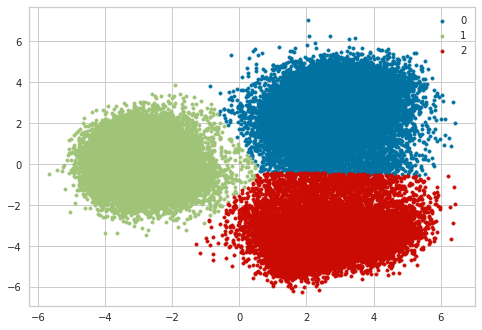

In [ ]:
# Import KMeans module

# Initialize the class object
kmeans = KMeans(n_clusters=3)
#print(df.shape)
# predict the labels of clusters.
label = kmeans.fit_predict(df)
#print(np.reshape(label, (81747,1)).shape)
# Getting unique labels
u_labels = np.unique(label)
plt.figure('PCA et kmeans')
# plotting the results:
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i, marker=".")
plt.legend()

In [ ]:
# Découpage du dataset en sous dataset en fonction des cluster formés par le kmeans
results = np.hstack((data, np.reshape(label, (81747,1))))
data2 = pd.DataFrame(results, columns=['CD45', 'CD45RA', 'CD19', 'CD11b', 'CD4	', 'CD8	', 'CD34', 'CD20', 'CD33', 'CD123', 'CD38', 'CD90', 'CD3', 'label'])
data0 = data2[data2['label'] == 0]
data1 = data2[data2['label'] == 1]
data2 = data2[data2['label'] == 2]
print('split 1', data0.shape)
print('split 2', data1.shape)
print('split 3', data2.shape)
#########

labels = data0['label']
data0 = data0.drop(['label'], axis=1)

split 1 (24289, 14)
split 2 (38333, 14)
split 3 (19125, 14)


In [ ]:
# Transform the data
pca = PCA(pca_dim)
df = pca.fit_transform(data0)


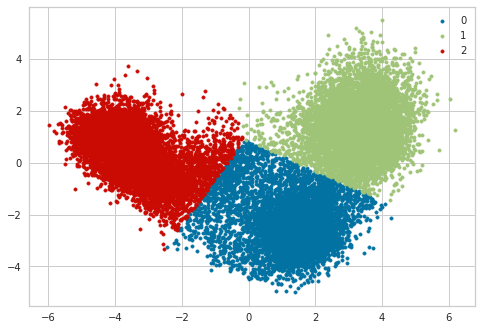

In [ ]:

# Initialize the class object
kmeans = KMeans(n_clusters=3)
#print(df.shape)
# predict the labels of clusters.
label = kmeans.fit_predict(df)
#print(np.reshape(label, (81747,1)).shape)
# Getting unique labels
u_labels = np.unique(label)
plt.figure('PCA et kmeans 2')
# plotting the results:
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i, marker=".")
plt.legend()

(167044, 14)
(81747,)


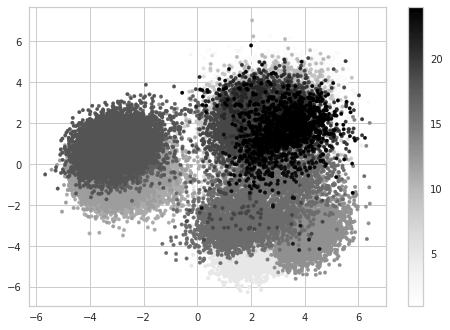

In [ ]:
# Load Data

data_reloaded = pd.read_csv("/content/Levine_13dim.txt", sep="\t")
print(data_reloaded.shape)
data_reloaded = data_reloaded.dropna()
labels = data_reloaded['label']
data_pca = data_reloaded.drop(['label'], axis=1)
pca = PCA(pca_dim)
#print(type(labels))
# Transform the data
df = pca.fit_transform(data_pca)
#print(df.shape)
plt.figure('PCA et labels')
print(data_reloaded['label'].shape)
plt.scatter(df[:, 0], df[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data_reloaded.get('label'), marker=".")

plt.colorbar()

## DBSCAN

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
# Load Data

data = pd.read_csv("/content/Levine_13dim.txt", sep="\t")
data.head()
data = data.dropna()
labels = data['label']
data = data.drop(['label'], axis=1)


In [ ]:
# Transform the data with PCA
pca_dim = 2
pca = PCA(pca_dim)
df = pca.fit_transform(data)

In [ ]:
db = DBSCAN(eps=0.1, min_samples=10).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

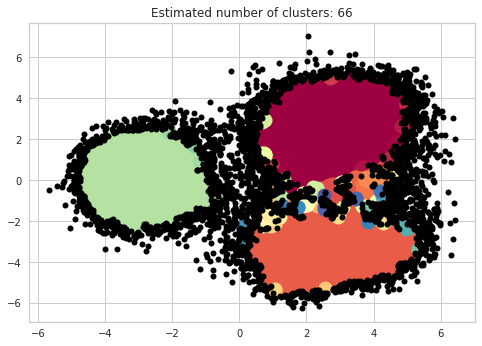

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## T-SNE

In [ ]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [ ]:
# Load Data

data = pd.read_csv("/content/Levine_13dim.txt", sep="\t")
data.head()
data = data.dropna()
labels = data['label']
data = data.drop(['label'], axis=1)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_result = tsne.fit_transform(data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 81747 samples in 0.190s...
[t-SNE] Computed neighbors for 81747 samples in 49.795s...
[t-SNE] Computed conditional probabilities for sample 1000 / 81747
[t-SNE] Computed conditional probabilities for sample 2000 / 81747
[t-SNE] Computed conditional probabilities for sample 3000 / 81747
[t-SNE] Computed conditional probabilities for sample 4000 / 81747
[t-SNE] Computed conditional probabilities for sample 5000 / 81747
[t-SNE] Computed conditional probabilities for sample 6000 / 81747
[t-SNE] Computed conditional probabilities for sample 7000 / 81747
[t-SNE] Computed conditional probabilities for sample 8000 / 81747
[t-SNE] Computed conditional probabilities for sample 9000 / 81747
[t-SNE] Computed conditional probabilities for sample 10000 / 81747
[t-SNE] Computed conditional probabilities for sample 11000 / 81747
[t-SNE] Computed conditional probabilities for sample 12000 / 81747
[t-SNE] Computed conditional probabilities for sa

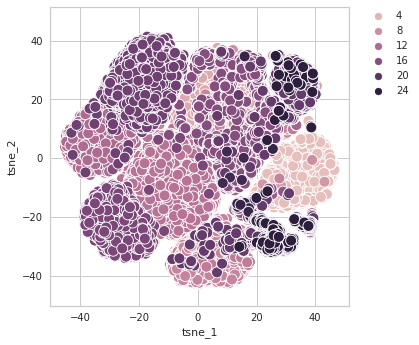

In [ ]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'label': labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=120)
lim = (tsne_result.min() - 5, tsne_result.max() + 5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

# Autres

In [ ]:
!pip install pycaret

  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [ ]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 0.23.2
Uninstalling scikit-learn-0.23.2:
  Successfully uninstalled scikit-learn-0.23.2


In [ ]:
!pip install scikit-learn==0.23.1

  Using cached scikit_learn-0.23.1-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.5 requires scikit-learn==0.23.2, but you have scikit-learn 0.23.1 which is incompatible.


In [ ]:
from pycaret.clustering import *

In [ ]:
data.head()

,CD45,CD45RA,CD19,CD11b,CD4,CD8,CD34,CD20,CD33,CD123,CD38,CD90,CD3,label
0,3.138041,1.618552,0.525611,-0.104680,0.811363,1.740672,0.531365,-0.153811,4.291140,2.615224,4.646570,1.849447,1.280036,1.0
1,3.486871,2.247755,0.309583,0.833397,1.550594,1.829030,-0.033018,0.290684,4.672004,1.532877,4.253449,0.422374,0.066806,1.0
2,2.145520,0.796811,-0.116073,0.186249,0.529898,0.834876,0.734445,1.590881,4.473149,0.443484,4.511387,0.124615,-2.066902,1.0
3,4.321869,0.167016,-0.639139,-0.020982,1.814245,-0.094315,1.416341,-0.028213,4.295604,2.546383,5.004100,1.326005,-1.015953,1.0
4,2.633997,0.714859,-0.173889,-0.042410,0.450911,1.587902,0.731608,0.139234,4.115300,1.579856,5.065479,0.632904,-0.703904,1.0


In [ ]:
data.drop(['label'], axis=1)

,CD45,CD45RA,CD19,CD11b,CD4,CD8,CD34,CD20,CD33,CD123,CD38,CD90,CD3
0,3.138041,1.618552,0.525611,-0.104680,0.811363,1.740672,0.531365,-0.153811,4.291140,2.615224,4.646570,1.849447,1.280036
1,3.486871,2.247755,0.309583,0.833397,1.550594,1.829030,-0.033018,0.290684,4.672004,1.532877,4.253449,0.422374,0.066806
2,2.145520,0.796811,-0.116073,0.186249,0.529898,0.834876,0.734445,1.590881,4.473149,0.443484,4.511387,0.124615,-2.066902
3,4.321869,0.167016,-0.639139,-0.020982,1.814245,-0.094315,1.416341,-0.028213,4.295604,2.546383,5.004100,1.326005,-1.015953
4,2.633997,0.714859,-0.173889,-0.042410,0.450911,1.587902,0.731608,0.139234,4.115300,1.579856,5.065479,0.632904,-0.703904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26547,4.660774,3.007695,3.126813,-0.148666,0.729036,-0.146158,1.511197,2.203130,0.734939,0.637343,2.903193,-0.090203,-1.596795
26548,4.762965,3.447160,3.532376,-0.047103,-0.043147,-0.154613,0.646376,2.520434,-0.029608,1.552956,2.394725,1.420944,-0.226291
26549,3.792670,1.652336,2.531428,1.571828,0.694949,-0.032939,-0.084343,1.727362,-0.180336,0.425390,2.223285,0.187379,0.320934
26550,2.853219,2.321096,3.549486,0.766920,-0.161741,-0.150467,0.587717,2.684124,-0.238142,-0.183613,3.151313,1.010593,-0.978052


In [ ]:
clf1 = setup(data = data, pca = True, pca_components = 2, normalize=True)


RuntimeError: ignored

In [ ]:
models()


In [ ]:
# creating a model
tsne = create_model('tsne', num_clusters = 3)
# plotting a model
plot_model(kmeans3)
#plot_model(kmeans4)